# House Price Prediction🏠💰

- **Dataset**: The Boston Housing Dataset
- **Source**: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data

**The Boston Housing Dataset:-**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

In [2380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2263]:
dataset=pd.read_csv('Random-Boston-house-price-data.csv')
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
1,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19,16.2
2,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305.0,19.2,383.73,6.72,24.2
3,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81,22.6
4,0.03551,25.0,4.86,0,0.426,6.167,46.7,5.4007,4,281.0,19.0,390.64,7.51,22.9


In [2266]:
# Display the shape of dataset
dataset.shape 

(506, 14)

#### The following describes the dataset columns:


1. **CRIM (Per Capita Crime Rate by Town)**  
   This column shows how much crime occurs in a town, adjusted for the number of people living there.  
   **Example:**  
   - A lower value like `0.00632` means the crime rate is very low.  
   - A higher value like `10.5` would indicate a higher crime rate.

---

2. **ZN (Proportion of Residential Land Zoned for Large Lots)**  
   This measures how much of the town's land is used for big houses (over 25,000 square feet).  
   **Example:**  
   - A value of `18.0` means 18% of the town is reserved for large residential lots.  
   - A value of `0.0` means no land is zoned for such houses.

---

3. **INDUS (Proportion of Non-Retail Business Acres)**  
   This indicates how much of the town's land is used for industries and non-shopping businesses.  
   **Example:**  
   - A value of `7.07` means 7.07% of the town is industrial.  
   - Lower values suggest the town is more residential.

---

4. **CHAS (Charles River Dummy Variable)**  
   A binary indicator of whether a town is near the Charles River.  
   - `1` = The town touches the river.  
   - `0` = The town doesn’t touch the river.  
   **Example:**  
   - If CHAS = `0`, the town is far from the river.  
   - If CHAS = `1`, it may have riverside views or activities.

---

5. **NOX (Nitric Oxides Concentration)**  
   This measures air pollution in the town (in parts per 10 million).  
   **Example:**  
   - A value of `0.538` means moderate pollution levels.  
   - Lower values are healthier, while higher values indicate poor air quality.

---

6. **RM (Average Number of Rooms per Dwelling)**  
   The average number of rooms in houses in the town.  
   **Example:**  
   - A value of `6.575` means most houses have about 6–7 rooms.  
   - Larger values suggest bigger houses.

---

7. **AGE (Proportion of Owner-Occupied Units Built Before 1940)**  
   Shows how old the houses are in the town.  
   **Example:**  
   - A value of `65.2` means 65.2% of the houses are older than 1940.  
   - Higher values suggest the town has many historic or older houses.

---

8. **DIS (Weighted Distance to Boston Employment Centers)**  
   Indicates how far a town is from major employment hubs in Boston.  
   **Example:**  
   - A value of `4.0900` means the town is moderately far from Boston jobs.  
   - Higher values mean the town is further away, while lower values mean it’s closer.

---

9. **RAD (Index of Accessibility to Radial Highways)**  
   A number showing how easy it is to reach major highways from the town.  
   **Example:**  
   - A value of `1` means the town has limited highway access.  
   - A higher value like `10` means excellent access to highways.

---

10. **TAX (Property Tax Rate per \\$10,000)**  <br>
    Indicates the tax rate on properties in the town.  
    **Example:**  
    - A value of `296.0` means \\$296 tax for every $10,000 property value.  
    - Higher values indicate more expensive areas for property tax.

---

11. **PTRATIO (Pupil-Teacher Ratio by Town)**  
    Represents how many students there are per teacher in schools in the town.  
    **Example:**  
    - A value of `15.3` means there are about 15 students for every teacher.  
    - Lower values suggest smaller class sizes.

---

12. **B (Proportion of Blacks by Town)**  
    `Bk` is the proportion of Black residents.  
    **Example:**  
    - A value of `396.90` suggests a high proportion of Black residents.  
    - Lower values mean fewer Black residents.

---

13. **LSTAT (Percentage of Lower-Status Population)**  
    This measures the proportion of the population with a lower socioeconomic status.  
    **Example:**  
    - A value of `4.98` means only 4.98% of the population is considered lower-status.  
    - Higher values mean a larger lower-status population.

---

14. **PRICE (Median Value of Owner-Occupied Homes)**  
    The median home price in the town (in thousands of dollars).  
    **Example:**  
    - A value of `24.0` means the median home value is $24,000.  
    - Higher values indicate wealthier areas.

---


In [2267]:
# Display the columns name
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [2268]:
# Display the datatype of each column
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [2269]:
# Display the information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [2270]:
# Extract statistical information from dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [2271]:
# Checking for missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### **Visual representations (e.g., histogram, scatter plot, etc.) of the dataset.**

Pair Plot: The below code output will be a grid of plots where:
- Each **scatter plot** shows the **relationship between two variables**.
- **Diagonal plots** often display **histograms** or kernel density estimates (KDEs) for individual variables.

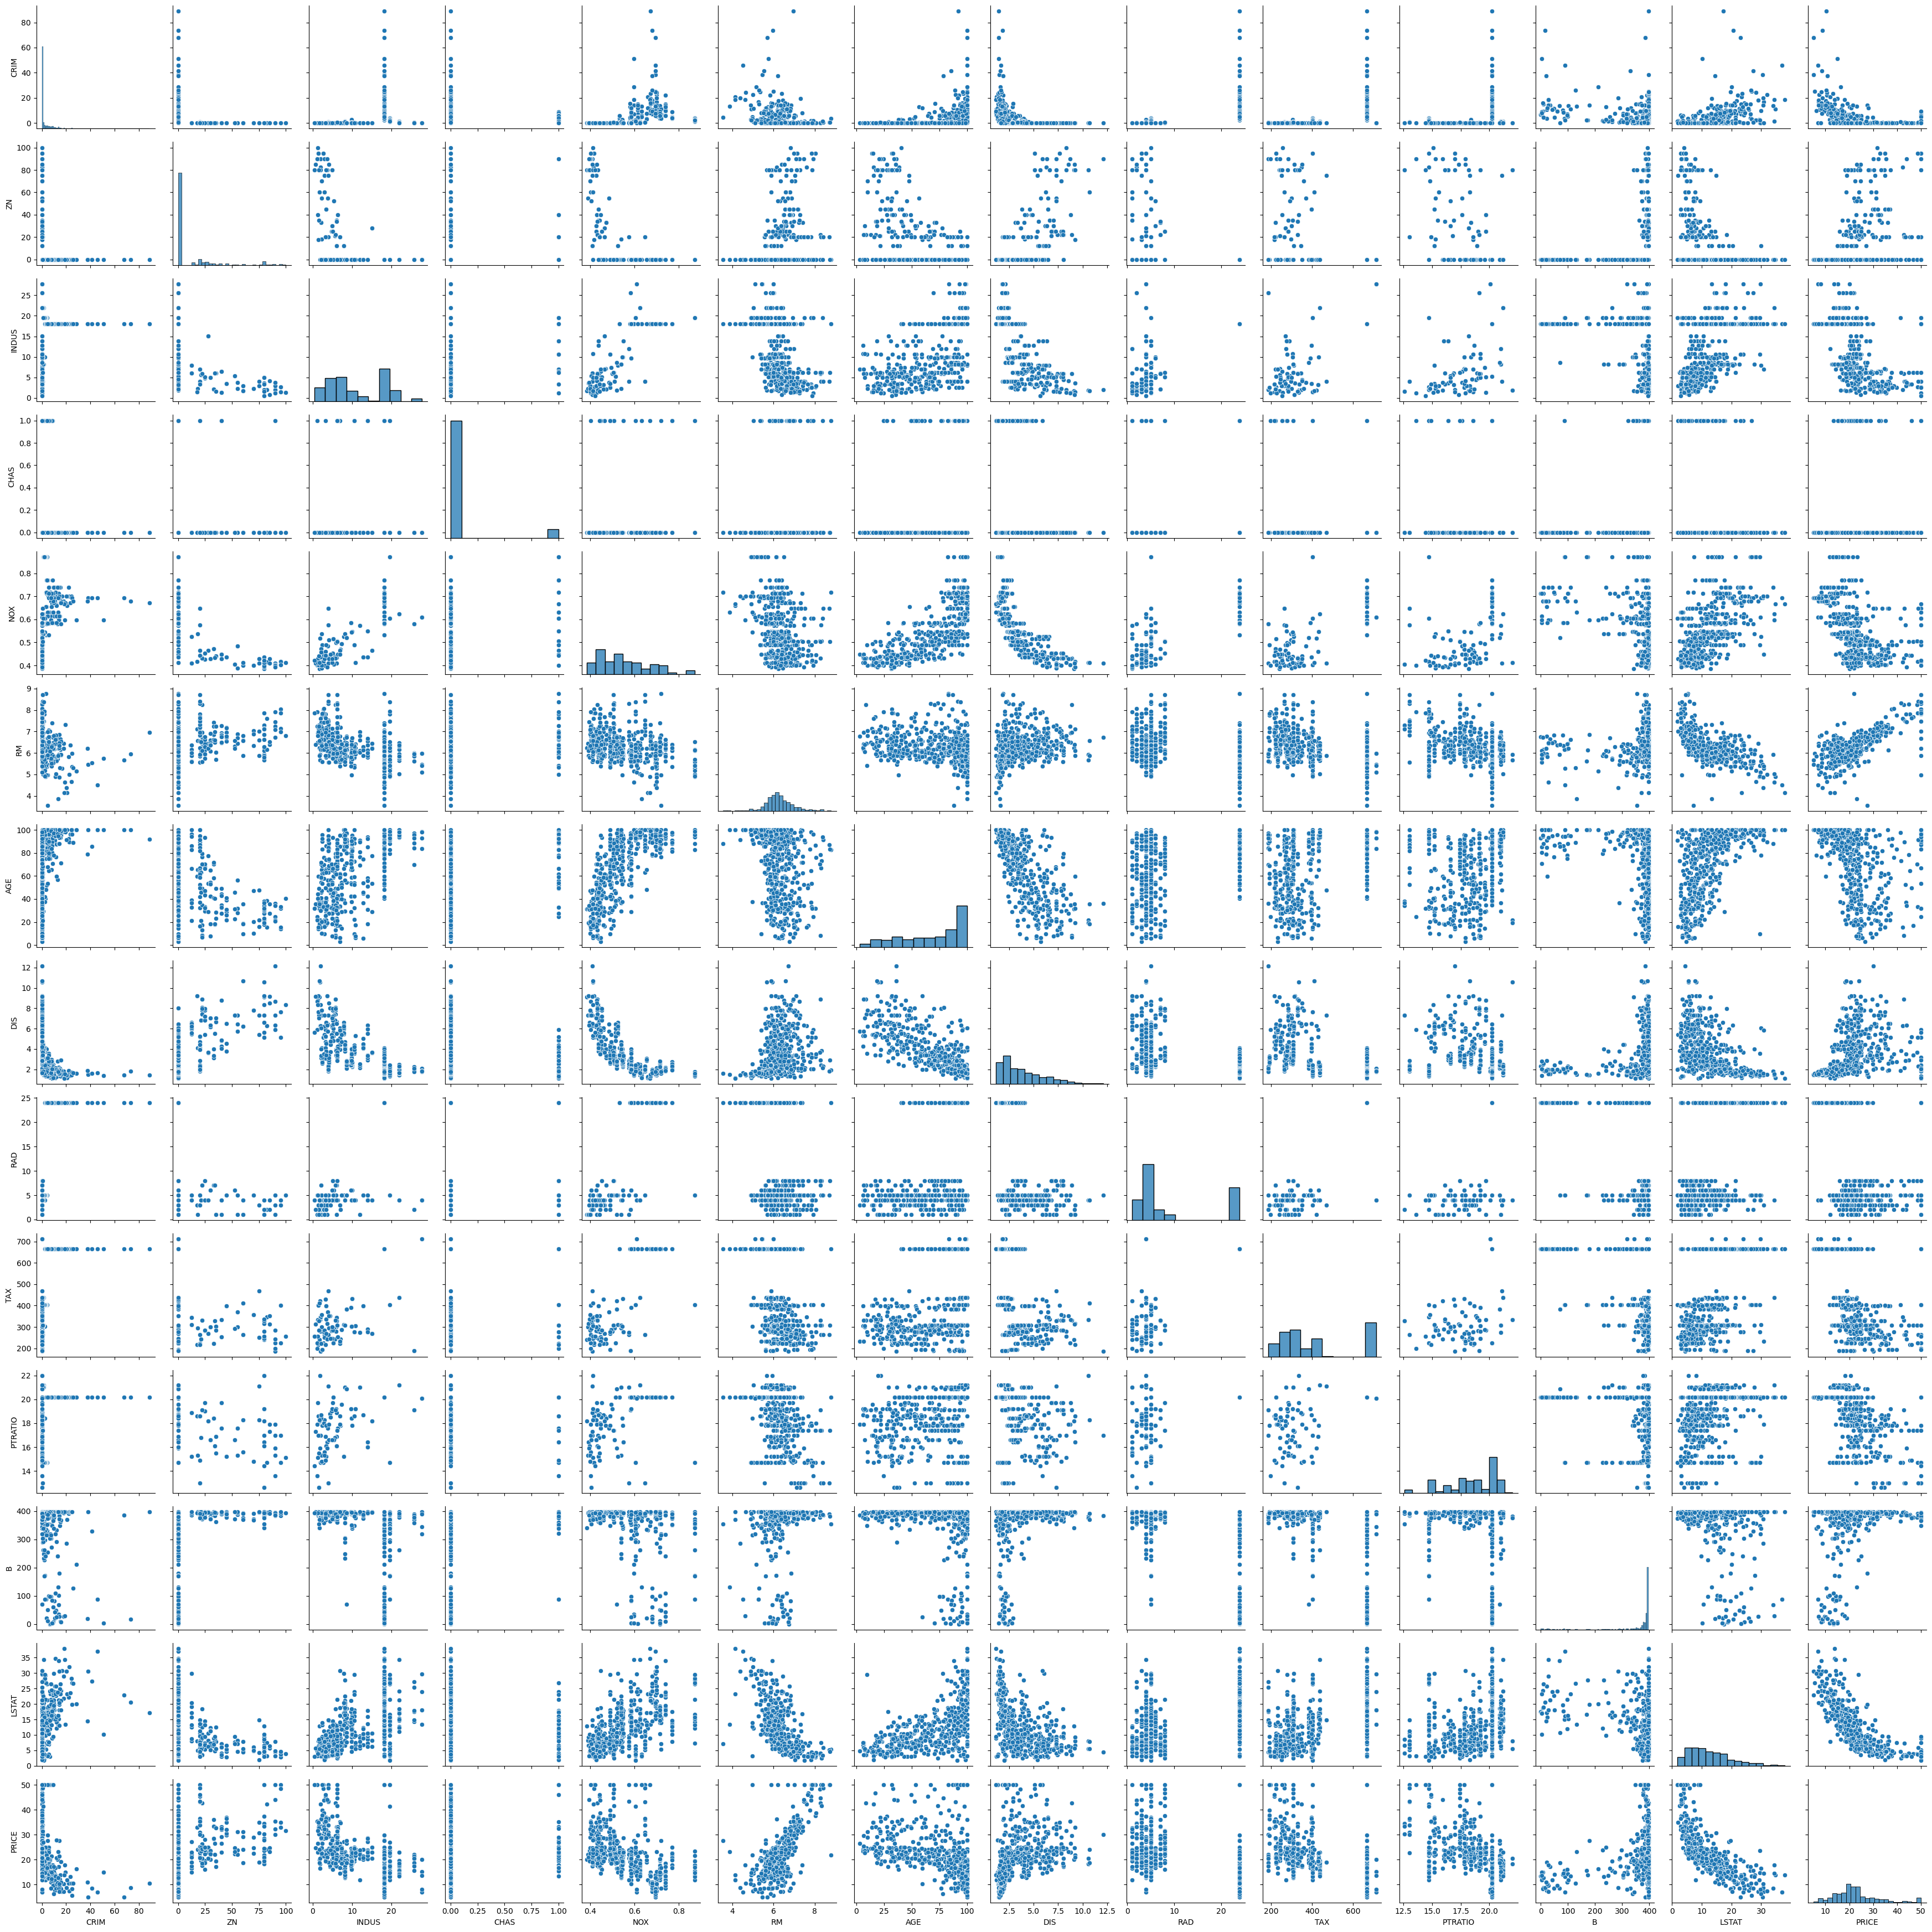

In [2406]:
sns.pairplot(dataset, height=2.5)
plt.tight_layout()

The below lines of code provide insights into the **shape of the distribution of `PRICE`**. 

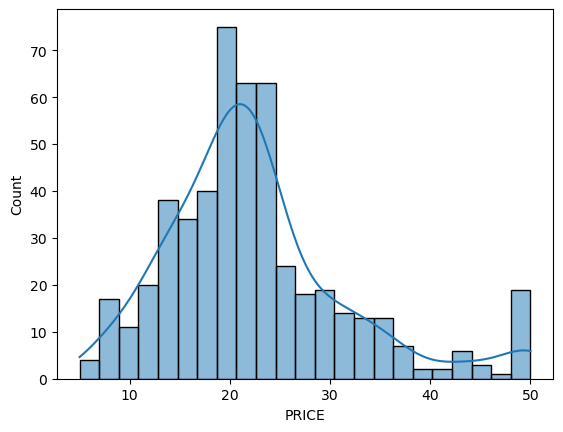

In [2273]:
sns.histplot(dataset['PRICE'], kde=True) # KDE=Kernel Density Estimate curve
plt.show()

In [2274]:
print("Skewness: %f" % dataset['PRICE'].skew())
print("Kurtosis: %f" % dataset['PRICE'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


**What is skewness?**: It's measure of the asymmetry of a distribution.
- If the skewness is close to 0, it indicates that the distribution is approximately symmetric.
- A positive skewness (greater than 0) suggests that the distribution has a longer right tail, meaning it is skewed to the right.
- A negative skewness (less than 0) suggests that the distribution has a longer left tail, meaning it is skewed to the left.

**Wht is kurtosis?**: It's measure the tails and the peakedness of a distribution.
- A kurtosis value of 3 is often considered normal (mesokurtic) and is the kurtosis of a normal distribution.
- Positive kurtosis (greater than 3) indicates heavier tails and a more peaked distribution (leptokurtic).
- Negative kurtosis (less than 3) indicates lighter tails and a flatter distribution (platykurtic).

### **Data Correlation**
Correlation measures the relationship between two variables and is expressed as a value between -1 and 1:
- 1: Perfect positive correlation (as one variable increases, the other increases proportionally).
- 0: No correlation (no linear relationship between the variables).
- -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).

In [2275]:
# Finding correlation between the features
corr=dataset.corr()
corr.shape

(14, 14)

In [2276]:
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Correlation Matrix

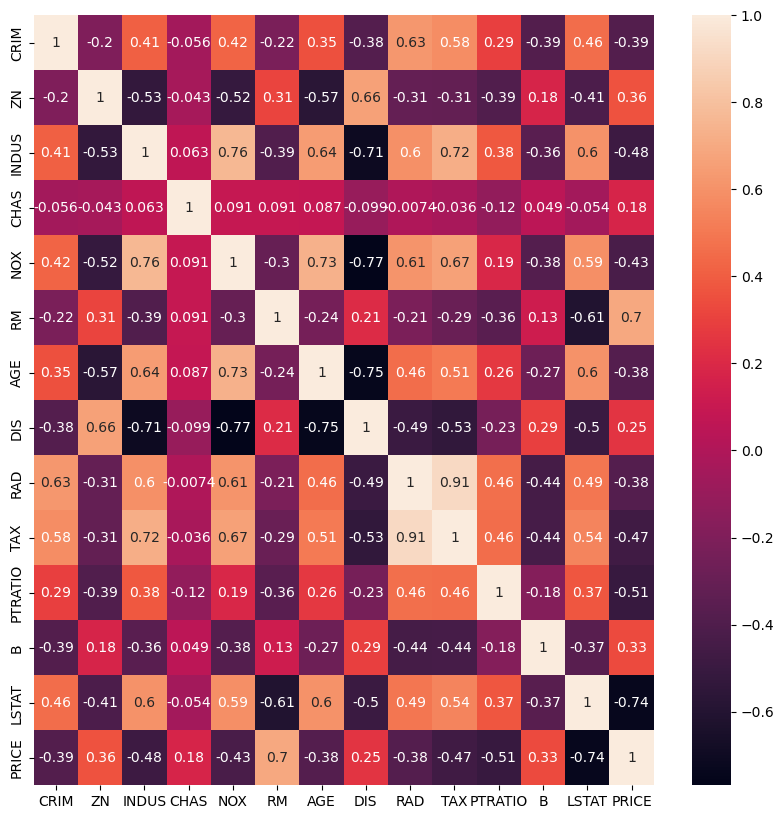

In [2277]:
# Show the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

#### 2D Feature Space
- Explained any 3 features using scatter plot

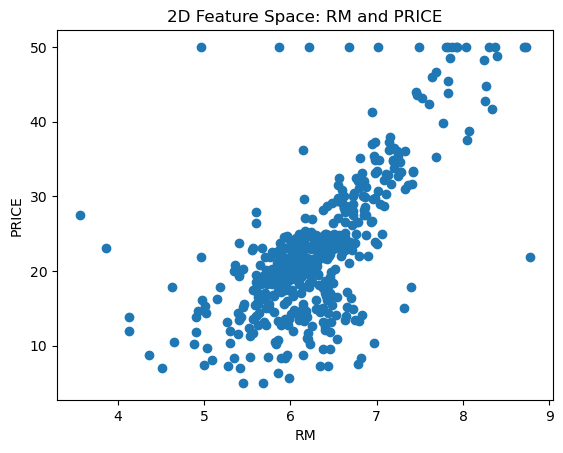

In [2378]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['RM'], y = dataset['PRICE'])
plt.ylabel('PRICE')
plt.xlabel('RM')
plt.title('2D Feature Space: RM and PRICE')
plt.show()

- Prices of houses increase with the increase in value of average number of rooms in houses in the town.
- Hence it is positively correlated.

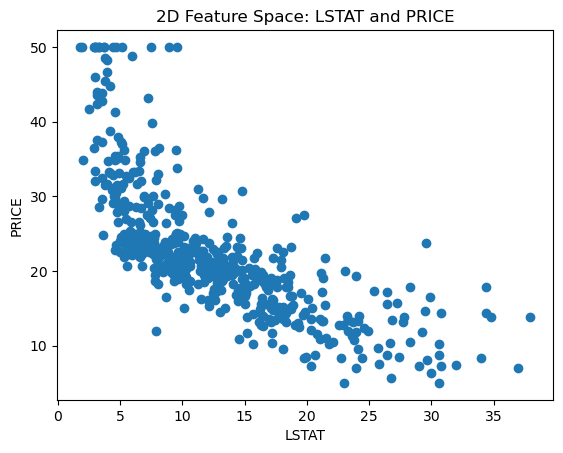

In [2279]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['LSTAT'], y = dataset['PRICE'])
plt.ylabel('PRICE')
plt.xlabel('LSTAT')
plt.title('2D Feature Space: LSTAT and PRICE')
plt.show()

- Areas with low lower socioeconomic status tend to have higher housing prices.
- As lower socioeconomic status increase, housing prices generally decrease.
- Hence it is negatively correlated.

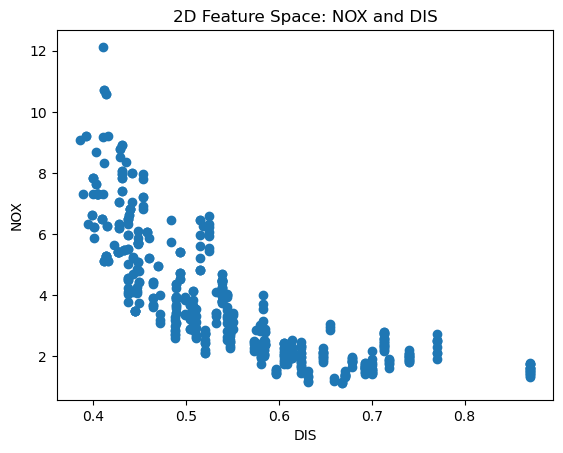

In [2280]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['NOX'], y = dataset['DIS'])
plt.ylabel('NOX')
plt.xlabel('DIS')
plt.title('2D Feature Space: NOX and DIS')
plt.show()

- Areas with low value of air pollution in the town(NOX) tend to have a far distance of town from major employment hubs in Boston.
- As lower air pollution increase, distance of town from employment hubs is also increase.

#### 3D Feature Space

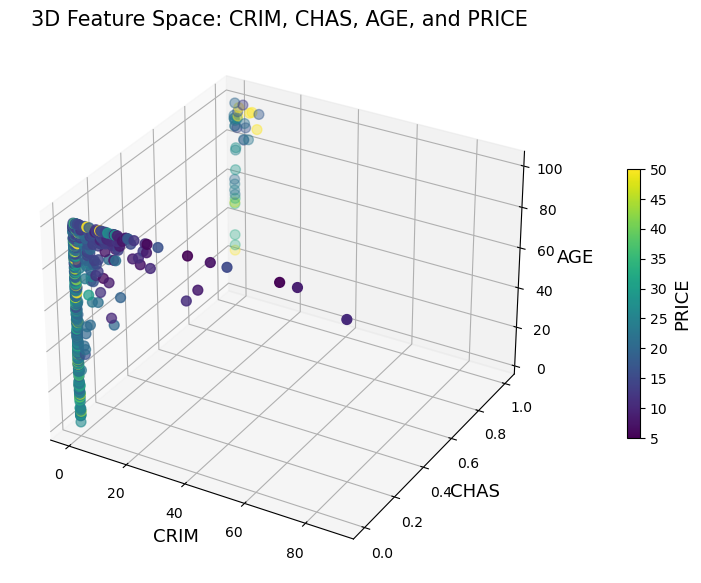

In [2281]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    xs=dataset['CRIM'],  # X-axis (CRIM)
    ys=dataset['CHAS'],   # Y-axis (NOX)
    zs=dataset['AGE'],   # Z-axis (AGE)
    c=dataset['PRICE'],  # Color indicates PRICE
    cmap='viridis',      # Colormap for PRICE
    s=50                 # Marker size
)

# Adding colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.5)
cbar.set_label('PRICE', fontsize=13)

# Adding labels
ax.set_xlabel('CRIM', fontsize=13)
ax.set_ylabel('CHAS', fontsize=13)
ax.set_zlabel('AGE', fontsize=13)
plt.title('3D Feature Space: CRIM, CHAS, AGE, and PRICE', fontsize=15)

# Show the plot
plt.show()

- Areas with low crime rates and moderate to newer homes tend to have higher housing prices.
- Areas with higher crime rates are generally associated with lower housing prices, regardless of home age or proximity to the Charles River.

### Divide the data domain of the datasets into 80:20 
- Where 80% is assigned to training datasets and 20% is assigned to test datasets.

In [2282]:
row,col=dataset.shape
TR=round(row*0.8)
print(TR)
TT=row-TR
print(TT)

dataset_train=dataset.iloc[0:TR,:]
print('dataset_train:',dataset_train.shape)
dataset_train.to_csv('housing_train.csv', index=False)

dataset_test=dataset.iloc[TR:row,:]
print('dataset_test:',dataset_test.shape)
dataset_test.to_csv('housing_test.csv', index=False)

405
101
dataset_train: (405, 14)
dataset_test: (101, 14)


In [2283]:
x_dataset_train=dataset_train.iloc[:,0:13] # Independent variables
print('x_dataset_train:',x_dataset_train.shape)

y_dataset_train=dataset_train['PRICE'] # Target variables
print('y_dataset_train:',y_dataset_train.shape)

x_dataset_test=dataset_test.iloc[:,0:13] # Independent variables
print('x_dataset_test:',x_dataset_test.shape)

y_dataset_test=dataset_test['PRICE'] # Target variables
print('y_dataset_test:',y_dataset_test.shape)

x_dataset_train: (405, 13)
y_dataset_train: (405,)
x_dataset_test: (101, 13)
y_dataset_test: (101,)


→ Before we begin training and testing datasets using different models, it's crucial to understand how we evaluate the model's predictions.

→ Below are some key terms that we need to familiarize with first(Regression Evaluation Metrics):


1. **Mean Absolute Error (MAE)**  
   MAE is the average of the absolute differences between the actual values and the predicted values. It tells you, on average, how much your predictions are "off" from the actual values.  
---
2. **Mean Squared Error (MSE)**
    MSE is the average of the squared differences between actual and predicted values. By squaring the differences, it penalizes larger errors more heavily than smaller ones.
---
3. **Root Mean Squared Error (RMSE)**
    RMSE is the square root of MSE. It brings the units back to the same scale as the original target variable, making it easier to interpret than MSE.
---
4. **R² (R-squared)**
    R² measures how well the independent variables explain the variance in the target variable.
    - Range: 0 to 1
    - R² = 1: Perfect fit (all data points are explained by the model).
    - R² = 0: The model does no better than predicting the mean of the target variable.
    - R² < 0: The model performs worse than predicting the mean.
    

---
### Linear Regression
---

Train model

In [2284]:
# Train model
linear_model = LinearRegression() # Create a Linear regressor
linear_model.fit(x_dataset_train, y_dataset_train) # Train the model using the training sets

LinearRegression()

Test model

In [2285]:
# Model prediction on train data
yhat_pred_linear = linear_model.predict(x_dataset_test)

Save it in csv file

In [2286]:
# Save it csv file
yhat_pred_linear=pd.DataFrame(yhat_pred_linear)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_linear = yhat_pred_linear.reset_index(drop=True)

dataset_linear_predict=pd.concat([dataset_test,yhat_pred_linear], axis=1)
dataset_linear_predict.columns.values[-1] = 'predict'
dataset_linear_predict.to_csv('dataset_linear_predict.csv', index=False)

In [2287]:
dataset_linear_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,19.510717
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,12.645642
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,35.599789
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,27.438011
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,21.564429


Model Evaluation

In [2288]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_linear))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_linear))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_linear)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_linear))

MAE: 3.1935974916809586
MSE: 17.5923029362562
RMSE: 4.194317934570077
R² (R-squared): 0.6814101607337995


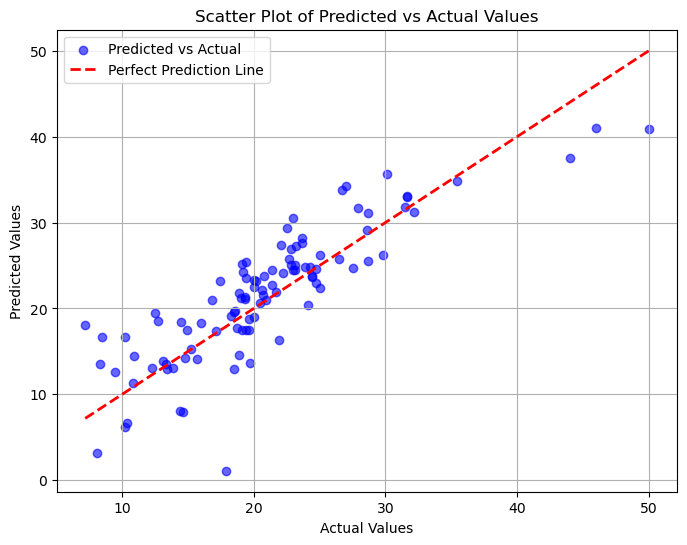

In [2346]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_linear, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Ridge Regression
---

Train model

In [2289]:
# Train model
ridge_model = Ridge(alpha=1.0)  # Regularization strength alpha
ridge_model.fit(x_dataset_train, y_dataset_train)


Ridge()

Test Model

In [2290]:
yhat_pred_ridge = ridge_model.predict(x_dataset_test)

Save it in csv file

In [2291]:
# Save it csv file
yhat_pred_ridge=pd.DataFrame(yhat_pred_ridge)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_ridge = yhat_pred_ridge.reset_index(drop=True)

dataset_ridge_predict=pd.concat([dataset_test,yhat_pred_ridge], axis=1)
dataset_ridge_predict.columns.values[-1] = 'predict'
dataset_ridge_predict.to_csv('dataset_ridge_predict.csv', index=False)

In [2292]:
dataset_ridge_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,19.657303
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,12.447759
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,36.035712
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,27.593450
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,22.427219


Model Evaluation

In [2293]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_ridge))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_ridge)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_ridge))

MAE: 3.1159208775427256
MSE: 17.3963985680925
RMSE: 4.170899011974816
R² (R-squared): 0.6849579134862938


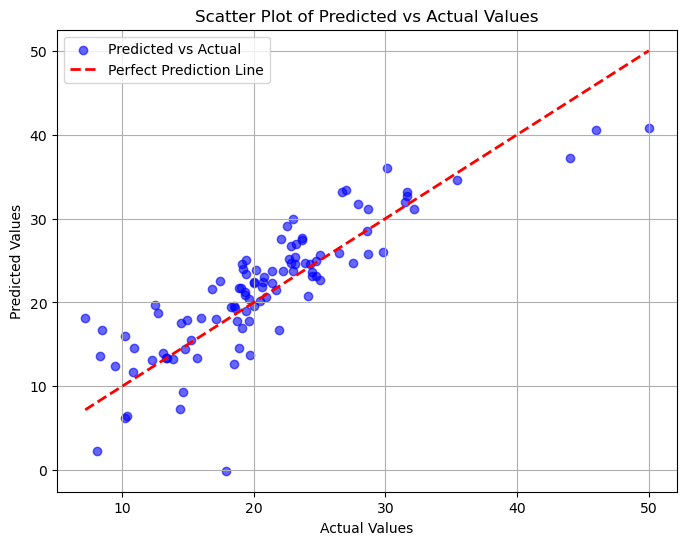

In [2345]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_ridge, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Lasso Regression
---

Train model

In [2294]:
# Train model
lasso_model = Lasso(alpha=0.1)  # Regularization strength alpha
lasso_model.fit(x_dataset_train, y_dataset_train)

Lasso(alpha=0.1)

Test Model

In [2295]:
yhat_pred_lasso = lasso_model.predict(x_dataset_test)

Save it in csv file

In [2296]:
# Save it csv file
yhat_pred_lasso=pd.DataFrame(yhat_pred_lasso)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_lasso = yhat_pred_lasso.reset_index(drop=True)

dataset_lasso_predict=pd.concat([dataset_test,yhat_pred_lasso], axis=1)
dataset_lasso_predict.columns.values[-1] = 'predict'
dataset_lasso_predict.to_csv('dataset_lasso_predict.csv', index=False)

In [2297]:
dataset_lasso_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,19.830082
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,12.116328
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,36.738694
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,27.915111
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,23.650481


Model Evaluation

In [2407]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_lasso))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_lasso))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_lasso)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_lasso))

MAE: 3.1372266607758537
MSE: 17.885065420000693
RMSE: 4.229073825319285
R² (R-squared): 0.6761083447647764


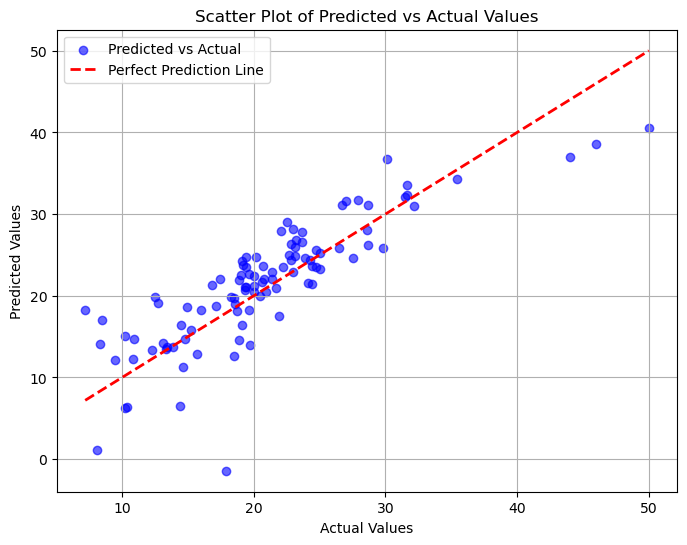

In [2344]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_lasso, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Elastic-Net Regression
---

Train model

In [2299]:
# Elastic-Net Regression
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Combination of Lasso (l1) and Ridge (l2)
elastic_model.fit(x_dataset_train, y_dataset_train)

ElasticNet(alpha=0.1)

Test Model

In [2300]:
yhat_pred_elastic = elastic_model.predict(x_dataset_test)

Save it in csv file

In [2301]:
# Save it csv file
yhat_pred_elastic=pd.DataFrame(yhat_pred_elastic)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_elastic = yhat_pred_elastic.reset_index(drop=True)

dataset_elastic_predict=pd.concat([dataset_test,yhat_pred_elastic], axis=1)
dataset_elastic_predict.columns.values[-1] = 'predict'
dataset_elastic_predict.to_csv('dataset_elastic_predict.csv', index=False)

In [2302]:
dataset_elastic_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,19.687830
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,11.937087
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,36.979141
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,28.085939
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,23.661524


Model Evaluation

In [2303]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_elastic))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_elastic))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_elastic)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_elastic))

MAE: 3.184957752521577
MSE: 18.210715813735945
RMSE: 4.267401529471529
R² (R-squared): 0.6702109413962117


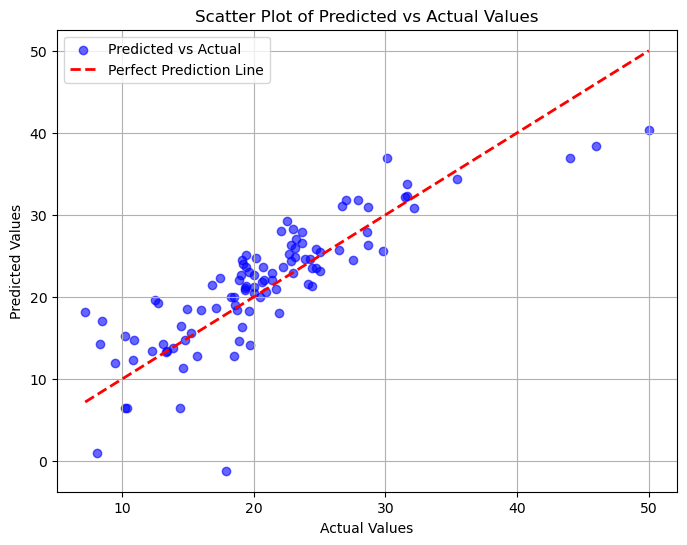

In [2343]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_elastic, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Support Vector Machine (SVM)
---

Train model

In [2328]:
# Elastic-Net Regression
svm_model = SVR(kernel='rbf')  # Radial Basis Function kernel for non-linear relationships
svm_model.fit(x_dataset_train, y_dataset_train)

SVR()

Test Model

In [2329]:
yhat_pred_svm = svm_model.predict(x_dataset_test)

Save it in csv file

In [2330]:
# Save it csv file
yhat_pred_svm=pd.DataFrame(yhat_pred_svm)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_svm = yhat_pred_svm.reset_index(drop=True)

dataset_svm_predict=pd.concat([dataset_test,yhat_pred_svm], axis=1)
dataset_svm_predict.columns.values[-1] = 'predict'
dataset_svm_predict.to_csv('dataset_svm_predict.csv', index=False)

In [2307]:
dataset_svm_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,15.693739
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,13.299049
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,22.998533
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,22.899503
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,24.386636


Model Evaluation

In [2341]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_svm))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_svm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_svm)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_svm))

MAE: 4.263769039790573
MSE: 35.68774818956788
RMSE: 5.973922345458457
R² (R-squared): 0.35370860764027645


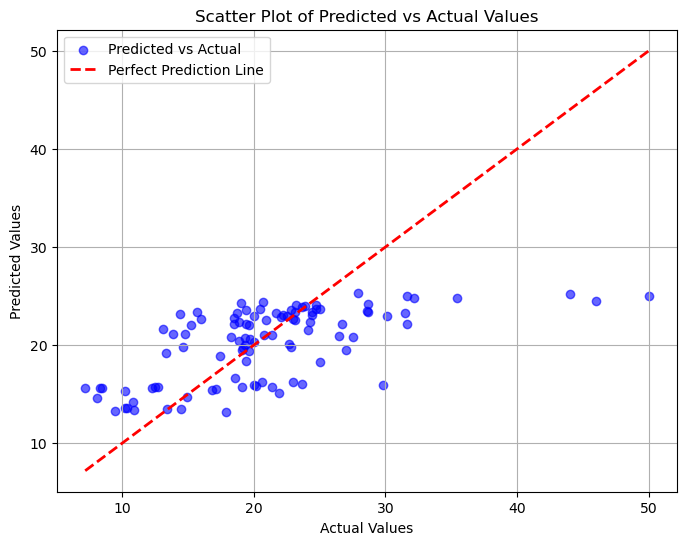

In [2342]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_svm, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Decision Tree
---

Train model

In [2309]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(max_depth=5)  # Limit depth to prevent overfitting
tree_model.fit(x_dataset_train, y_dataset_train)

DecisionTreeRegressor(max_depth=5)

Test Model

In [2310]:
yhat_pred_tree = tree_model.predict(x_dataset_test)

Save it in csv file

In [2326]:
# Save it csv file
yhat_pred_tree=pd.DataFrame(yhat_pred_tree)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_tree = yhat_pred_tree.reset_index(drop=True)

dataset_tree_predict=pd.concat([dataset_test,yhat_pred_tree], axis=1)
dataset_tree_predict.columns.values[-1] = 'predict'
dataset_tree_predict.to_csv('dataset_tree_predict.csv', index=False)

In [2312]:
dataset_tree_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,14.105882
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,8.772000
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,25.853846
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,24.006061
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,24.006061


Model Evaluation

In [2337]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_tree))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_tree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_tree)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_tree))

MAE: 2.3984650715257785
MSE: 8.532367550904276
RMSE: 2.9210216621764853
R² (R-squared): 0.8454821056428884


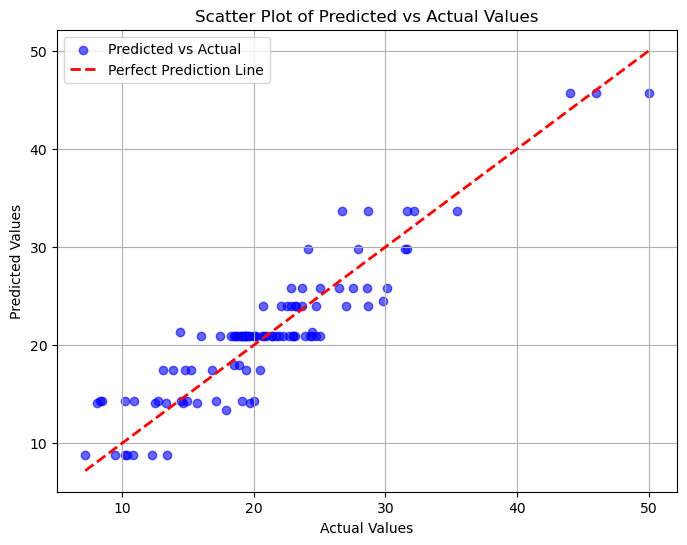

In [2340]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_tree, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

---
### Random Forest
---

Train model

In [2314]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_dataset_train, y_dataset_train)

RandomForestRegressor(max_depth=5, random_state=42)

Test Model

In [2315]:
yhat_pred_rf = rf.predict(x_dataset_test)

Save it in csv file

In [2316]:
# Save it csv file
yhat_pred_rf=pd.DataFrame(yhat_pred_rf)

dataset_test = dataset_test.reset_index(drop=True)
yhat_pred_rf = yhat_pred_rf.reset_index(drop=True)

dataset_rf_predict=pd.concat([dataset_test,yhat_pred_rf], axis=1)
dataset_rf_predict.columns.values[-1] = 'predict'
dataset_rf_predict.to_csv('dataset_rf_predict.csv', index=False)

In [2317]:
dataset_rf_predict.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,predict
0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,12.5,14.896960
1,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08,9.5,12.089834
2,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1,29.660039
3,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,23.534172
4,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7,23.546594


Model Evaluation

In [2335]:
print('MAE:',metrics.mean_absolute_error(y_dataset_test, yhat_pred_rf))
print('MSE:',metrics.mean_squared_error(y_dataset_test, yhat_pred_rf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dataset_test, yhat_pred_rf)))
print("R² (R-squared):", r2_score(y_dataset_test, yhat_pred_rf))

MAE: 2.029679117921366
MSE: 6.068409704663133
RMSE: 2.463414237326547
R² (R-squared): 0.8901034344727178


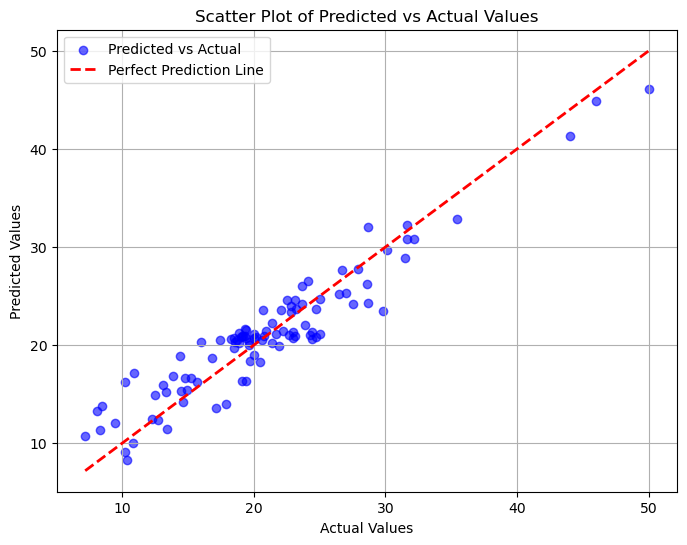

In [2336]:
plt.figure(figsize=(8, 6))
plt.scatter(y_dataset_test, yhat_pred_rf, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_dataset_test.min(), y_dataset_test.max()], 
         [y_dataset_test.min(), y_dataset_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()

## Comparison of all Regression Model

| Model Name                 | MAE    | MSE     | RMSE   | R²      |
|----------------------------|--------|---------|--------|---------|
| Linear Regression          | 3.193  | 17.592  | 4.194  | 0.6814  |
| Ridge Regression           | 3.115  | 17.396  | 4.170  | 0.684  |
| Lasso Regression           | 3.137  | 17.885  | 4.229  | 0.676  |
| Elastic-Net Regression     | 3.184  | 18.210  | 4.267  | 0.670  |
| Support Vector Machine (SVM) | 4.263  | 35.687  | 5.973  | 0.353  |
| Decision Tree              | 2.398  | 8.532  | 2.921  | 0.845  |
| Random Forest              | 2.029  | 6.068  | 2.463  | 0.890  |

- Random Forest demonstrates the best performance among all models, with the lowest errors (MAE, MSE, and RMSE) and the highest R², indicating that it explains 89% of the variance in the dataset effectively.
- `Random Forest` is the most suitable model for this dataset


## Cross Validation:-

Cross-validation is used to evaluate the performance of a machine learning model by dividing the dataset into multiple subsets (or folds) and training and testing the model on different portions of the data. It ensures that the model's performance is evaluated on unseen data and reduces the risk of overfitting.
- I am using **5-fold cross validation** (cv=5) for all above regression model.

In [2398]:
x_dataset=dataset.iloc[:,0:13] # Independent variables
print('x_dataset_train:',x_dataset.shape)

y_dataset=dataset['PRICE'] # Target variables
print('y_dataset_train:',y_dataset.shape)

x_dataset_train: (506, 13)
y_dataset_train: (506,)


---
### Linear Regression
---

In [2399]:
linear_model = LinearRegression() 
cv_scores = cross_val_score(linear_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.73833971 0.74587414 0.6953567  0.6637133  0.68141016]
Mean R² (Cross-Validation): 0.7049388036578506


---
### Ridge Regression
---

In [2400]:
ridge_model=Ridge(alpha=1.0)
cv_scores = cross_val_score(ridge_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.73883986 0.73761911 0.6942155  0.65750362 0.68495791]
Mean R² (Cross-Validation): 0.7026272008497456


---
### Lasso Regression
---

In [2401]:
lasso_model=Lasso(alpha=0.1)
cv_scores = cross_val_score(lasso_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.73196842 0.7288265  0.67984875 0.64844195 0.67610834]
Mean R² (Cross-Validation): 0.6930387933125047


---
### Elastic-Net Regression
---

In [2402]:
elastic_model=ElasticNet(alpha=0.1,l1_ratio=0.5)
cv_scores = cross_val_score(elastic_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.72847258 0.72804756 0.68140213 0.64941963 0.67021094]
Mean R² (Cross-Validation): 0.6915105699336159


---
### Support Vector Machine (SVM)
---

In [2403]:
svm_model=SVR(kernel='rbf')
cv_scores = cross_val_score(svm_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [ 0.2935867   0.28912171 -0.01642956  0.12497988  0.35370861]
Mean R² (Cross-Validation): 0.20899346837721683


---
### Decision Tree
---

In [2404]:
tree_model=DecisionTreeRegressor(max_depth=5)
cv_scores = cross_val_score(tree_model, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.7458558  0.68400883 0.87739796 0.7366682  0.84548211]
Mean R² (Cross-Validation): 0.777882579336309


---
### Random Forest
---

In [2405]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
cv_scores = cross_val_score(rf, x_dataset, y_dataset, cv=5, scoring='r2')
# r² will be used as the evaluation metric.

print("R² Scores for each fold:", cv_scores)

mean_r2 = np.mean(cv_scores) # Average R² across all folds
print("Mean R² (Cross-Validation):", mean_r2)

R² Scores for each fold: [0.88396245 0.7557336  0.88369658 0.86978387 0.89010343]
Mean R² (Cross-Validation): 0.8566559890821239


## Comparison of Cross Validation Result:

| Model Name                 | Mean R²      |
|----------------------------|---------|
| Linear Regression          | 0.704  |
| Ridge Regression           | 0.702  |
| Lasso Regression           | 0.693  |
| Elastic-Net Regression     | 0.691  |
| Support Vector Machine (SVM) | 0.208  |
| Decision Tree              | 0.777  |
| Random Forest              | 0.856 |

# Final Thought 📌📍

## Most effective model: `Random Forest`
- **Random Forest** works best for this project.